# Assignment 4 - Evaluation

Jonathan Chia - jchia3 - due 9/24/2023

Generally, a parameter selection procedure might be necessary to evaluate Probability of
Detection versus Probability of False Alarm (i.e., Pd versus Pf) in order to make a decision
about a classifier model selection and/or hyper parameter tuning for a classifier.

In this assignment we will produce an ROC plot presenting operating points of various
classifiers and their varying parameters so that we can make a justifiable operating
classifier/parameter selection for the following problem.

The classification of fake news or misinformation is a very important task today. Download the
fake news dataset (https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset),
Fake.csv and True.csv files. Load the data sets in your model development framework,
examine the features to see they are text in title and text columns. Set fake as 1 and true
as 0. Concatenate to have around 44880 rows. Apply necessary pre-processing to extract
title column in Tf-Idf. These are basically words and their term frequency – inverse
document frequency. Use around 50 features. Make sure sanity check the pipeline and
perhaps run your favorite baseline classifier first.



# 0. Preprocess the data

In [1]:
# Read in the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
df_true['class'] = 0; df_fake['class'] = 1
df = pd.concat([df_fake, df_true])

X = TfidfVectorizer(stop_words='english', max_features=50).fit_transform(df['title'])

In [4]:
X.shape

(44898, 50)

In [5]:
X_df = pd.DataFrame(X.toarray())
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.313406,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.378269,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.505692,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.307417,0.0,0.0,0.0,0.0,0.0


In [6]:
X_df.apply(lambda x: sum(x), axis=0)

0      554.507574
1      601.513610
2      458.873556
3      620.673463
4      620.720496
5      645.267586
6      552.864717
7      637.594531
8     1211.822939
9      425.676541
10     797.149242
11     517.351707
12     488.371516
13     651.112878
14     765.715468
15     515.473069
16     456.738611
17     501.802219
18     593.150681
19     511.110086
20    1460.839394
21    1248.267190
22     525.329101
23     990.949105
24     604.946352
25     667.545282
26     549.520455
27    1258.376048
28     685.170267
29     663.292430
30    2095.137854
31     464.055137
32     449.772740
33     657.455719
34    1143.244851
35     786.324686
36     586.418735
37     966.829032
38     498.008399
39    2355.558382
40     704.631038
41     847.133055
42     464.993904
43     564.031551
44    7717.699556
45     469.901665
46    4682.588699
47     654.837190
48    1316.403503
49    1027.482475
dtype: float64

So there's some variation between each column, so it might be good to apply a minmax scaler. It's probably not necessary for random forest or decision tree, but might help with the neural network.

In [7]:
y = df['class']

# 1. ROC of 3 classifiers

*By using three classifiers, decision tree, random forest and neural network and at*
*least 2 different hyper-parameter settings for each, generate operating points (via cross*
*validation, mean FPR and mean TPR) and plot them on a ROC. Do not hesitate to*
*use/modify the ROC plot code in the module notebook.*

*In case you do not see enough*
*variety in Pd-Pf you might need to work on the classifiers set and/or hyper parameters. And*
*do not hesitate to try hundreds, if necessary, since the ROC is just a natural scatter plot.*
*(Recommended parameters and ranges: depth [3-12], number of features [3-20], number of*
*estimators [20-100], layer size [1-10], learning rate; and total of 10-20 OPs)*

So instead of training, validation, and test, we will just do train and test, with cross validation on training set.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.1, random_state=0, shuffle=True)

In [9]:
# 1. Create a ROC curve function
def annot(opi, _x, _y):
    plt.annotate(f"OP{opi}", xy=(_x, _y), xytext=(.90*_x+.1, .80*_y), arrowprops=dict(facecolor='lightgray', shrink=1))


def plot_roc(_fpr, _tpr, _title, _label):    
    plt.scatter(_fpr, _tpr, s=20, marker='o', c='r', label=_label, alpha=0.7)
    plt.plot(np.arange(0.001,1,0.01), np.arange(0.001,1,0.01), linestyle='--', color=(0.6,0.6,0.6), label='Random Guess')
    # Annotate certain operating points
    annot(1, _fpr[1], _tpr[1])
    annot(2, _fpr[6], _tpr[6])
    annot(3, _fpr[11], _tpr[11])
    annot(4, _fpr[16], _tpr[16])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(_title)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



In [10]:
# 2. Create a function that will run the model and output a table of mean FPR, mean TPR, and the threshold. Function inputs is a pipeline and the threshold. 
tree_model = DecisionTreeClassifier(random_state=0)

def kfold_fpr_tpr_prob_threshold(_pipeline, _threshold): 
    kfold = KFold(n_splits = 10).split(X_train, y_train)

    TPR, FPR = [], []
    for k, (train, test) in enumerate(kfold):
        _pipeline.fit(X_train.iloc[train], y_train.iloc[train])
        y_pred_prob = _pipeline.predict_proba(X_train.iloc[test])[:, 1] # get positive class probabilities
        y_pred = (y_pred_prob >= _threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_train.iloc[test], y_pred).ravel()
        TPR += [tp/(tp+fn)]  # Pd
        FPR += [fp/(fp+tn)]  # Pf
    
    return np.mean(TPR), np.mean(FPR)

TPR_list, FPR_list = [], []
for threshold in np.linspace(0.05, 1., 20):
    TPR, FPR = kfold_fpr_tpr_prob_threshold(tree_model, threshold)
    TPR_list.append(TPR)
    FPR_list.append(FPR)

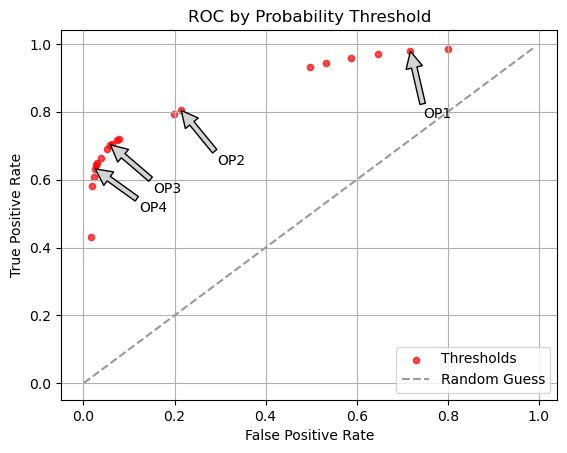

In [11]:
# 3. Plot the ROC curve
plot_roc(FPR_list, TPR_list, 'ROC by Probability Threshold', 'Thresholds')

## Hyperparameters - Plot on ROC

Do we care more about false positives or false negatives?

So false positive is we think it's fake put it's actually true
False negative is we think it's true but it's actually fake news

Hmm I guess it depends. If we want to make sure the public has only access to true information, then we are okay with many false positives, but we don't want false negatives. 

Note: You will see below that two of my ROC curves don't actually have a curve. The reason is because the hyperparameters I chose didn't change the model TPR/FPR rate that much. 

### Decision Tree

In [12]:
from sklearn.metrics import accuracy_score

def kfold_fpr_tpr(_pipeline): 
    kfold = KFold(n_splits = 10).split(X_train, y_train)

    TPR, FPR, accuracy = [], [], []
    for k, (train, test) in enumerate(kfold):
        _pipeline.fit(X_train.iloc[train], y_train.iloc[train])
        y_pred = _pipeline.predict(X_train.iloc[test])
        tn, fp, fn, tp = confusion_matrix(y_train.iloc[test], y_pred).ravel()
        TPR += [tp/(tp+fn)]  # Pd
        FPR += [fp/(fp+tn)]  # Pf
        accuracy += [accuracy_score(y_train.iloc[test], y_pred)]
    
    return np.mean(TPR), np.mean(FPR), np.mean(accuracy)

In [13]:
# 1. Use hyperparameter tuning to come up with best models then compare their ROC curves at different hyperparameters
param_grid = {'criterion': ['gini'],
               'max_depth': [3,6, 10,12],
               'min_samples_leaf':[2,10,40,100],
               'max_features': [3, 9, 16, 20]
               }

TPR_list, FPR_list, param_list, accuracy_list = [], [], [], []

for _criterion in param_grid['criterion']:
    for _max_depth in param_grid['max_depth']:
        for _min_samples_leaf in param_grid['min_samples_leaf']:
            for _max_features in param_grid['max_features']:
                param_dict = {'criterion': _criterion,
                                        'max_depth': _max_depth,
                                        'min_samples_leaf': _min_samples_leaf,
                                        'max_features': _max_features}
                tree_model = DecisionTreeClassifier(random_state=0, **param_dict)
                
                TPR, FPR, accuracy = kfold_fpr_tpr(tree_model)
                param_list.append(param_dict)
                TPR_list.append(TPR)
                FPR_list.append(FPR)
                accuracy_list.append(accuracy)

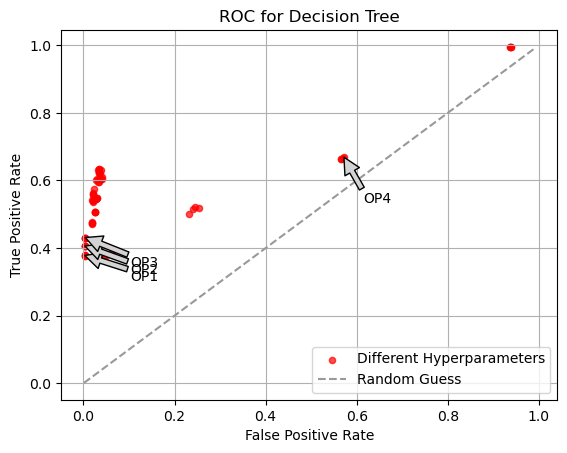

In [14]:
plot_roc(FPR_list, TPR_list, 'ROC for Decision Tree', 'Different Hyperparameters')

Ok let's examine which hyperparameters have the biggest effect

In [15]:
tree_results1 = pd.DataFrame(param_list)
tree_results2 = pd.DataFrame({'TPR': TPR_list,
                              'FPR': FPR_list,
                              'Accuracy': accuracy_list})

tree_results = pd.concat([tree_results1, tree_results2], axis=1)

Which hyperparameter is most important? Let's plot it!

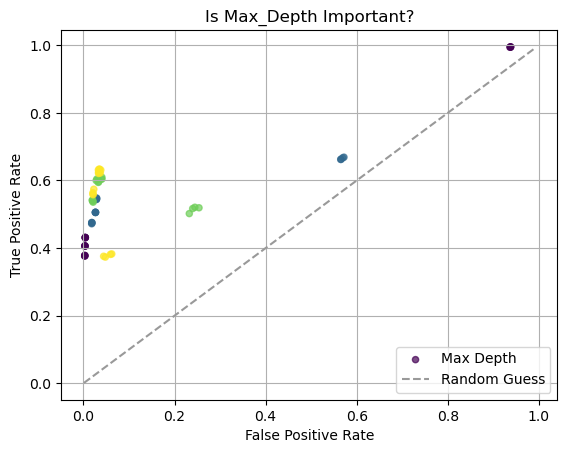

In [16]:
plt.scatter(tree_results.FPR, tree_results.TPR, s=20, marker='o', c=tree_results.max_depth, label='Max Depth', alpha=0.7)
plt.plot(np.arange(0.001,1,0.01), np.arange(0.001,1,0.01), linestyle='--', color=(0.6,0.6,0.6), label='Random Guess')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Is Max_Depth Important?')
plt.legend(loc='lower right')
plt.grid()
plt.show()

This might be a waste of time so let's just find the best hyperparameter combination

In [17]:
tree_results.sort_values('Accuracy', ascending=False).head()

,criterion,max_depth,min_samples_leaf,max_features,TPR,FPR,Accuracy
55,gini,12,10,20,0.633709,0.034816,0.791724
51,gini,12,2,20,0.631144,0.032724,0.791427
59,gini,12,40,20,0.632438,0.035060,0.791006
63,gini,12,100,20,0.630800,0.038025,0.788705
50,gini,12,2,16,0.623728,0.033068,0.787393


Looks like higher depth and max features is better.

#### Evaluate best hyperparameter model on the testing data

In [18]:
def output_test_results(preds, actuals):
    tn, fp, fn, tp = confusion_matrix(actuals, preds).ravel()
    TPR = tp/(tp+fn) # Pd
    FPR = fp/(fp+tn)  # Pf
    accuracy = accuracy_score(actuals, preds)

    return TPR, FPR, accuracy

In [19]:
best_tree = DecisionTreeClassifier(random_state=0, max_depth=12, min_samples_leaf=10, max_features=20)

best_tree.fit(X_train, y_train)
y_preds = best_tree.predict(X_test)

TPR, FPR, accuracy = output_test_results(y_preds, y_test)

In [20]:
print(f"TPR: {round(TPR*100,2)}%")
print(f"FPR: {round(FPR*100,2)}%")
print(f"Accuracy: {round(accuracy*100,2)}%")

TPR: 62.77%
FPR: 3.54%
Accuracy: 78.86%


### Random Forest

I don't want a ton of for loops so let's functionize this

In [21]:
from itertools import product 

def output_results_different_hyper(param_grid, kfold_fpr_tpr):  
    TPR_list, FPR_list, param_list, accuracy_list = [], [], [], []

    for params in product(*param_grid.values()): # thanks to chatgpt for giving me this solution
        param_dict = {
            key: value for key, value in zip(param_grid.keys(), params)
        }
        
        model = RandomForestClassifier(random_state=0, **param_dict, n_jobs=-1)
        
        TPR, FPR, accuracy = kfold_fpr_tpr(model)
        
        param_list.append(param_dict)
        TPR_list.append(TPR)
        FPR_list.append(FPR)
        accuracy_list.append(accuracy)

    return TPR_list, FPR_list, param_list, accuracy_list

In [22]:
param_grid = {'criterion': ['gini'],
               'max_depth': [12, 20],
               'min_samples_leaf':[10, 40, 100], # samples didn't seem to matter too much
               'n_estimators': [20, 50, 100], # number of trees
               'bootstrap': [True, False], # bootstrap sampling? 
               'max_features': ['log2', 'sqrt'] # max features tree should consider before making a split
               }

TPR_list, FPR_list, param_list, accuracy_list = output_results_different_hyper(param_grid, kfold_fpr_tpr)

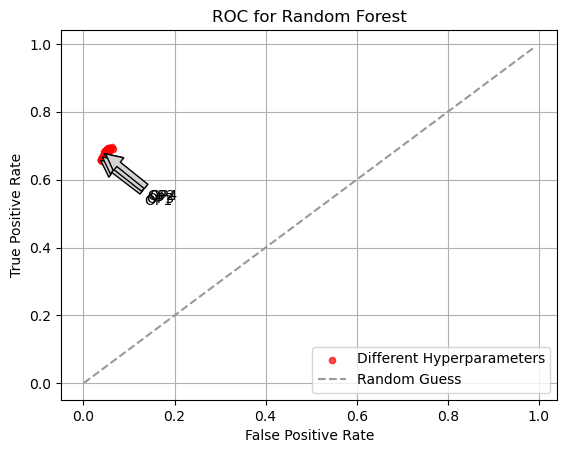

In [23]:
plot_roc(FPR_list, TPR_list, 'ROC for Random Forest', 'Different Hyperparameters')

In [24]:
forest_results1 = pd.DataFrame(param_list)
forest_results2 = pd.DataFrame({'TPR': TPR_list,
                              'FPR': FPR_list,
                              'Accuracy': accuracy_list})

forest_results = pd.concat([forest_results1, forest_results2], axis=1)

In [25]:
forest_results.sort_values('Accuracy', ascending=False).head()

,criterion,max_depth,min_samples_leaf,n_estimators,bootstrap,max_features,TPR,FPR,Accuracy
44,gini,20,10,100,True,log2,0.690919,0.051428,0.813799
46,gini,20,10,100,False,log2,0.690430,0.050966,0.813774
40,gini,20,10,50,True,log2,0.692692,0.053468,0.813774
42,gini,20,10,50,False,log2,0.691122,0.051890,0.813675
54,gini,20,40,50,False,log2,0.690146,0.052816,0.812710


Looks like the best hyperparameters are 20 depth, 10 min_samples, 100 estimators, and max_features= log2

### Evaluate on Testing Data

In [26]:
#### Evaluate best hyperparameter model on the testing data
def output_test_results(preds, actuals):
    tn, fp, fn, tp = confusion_matrix(actuals, preds).ravel()
    TPR = tp/(tp+fn) # Pd
    FPR = fp/(fp+tn)  # Pf
    accuracy = accuracy_score(actuals, preds)

    return TPR, FPR, accuracy
best_forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=10, max_features='log2')

best_forest.fit(X_train, y_train)
y_preds = best_forest.predict(X_test)

TPR, FPR, accuracy = output_test_results(y_preds, y_test)
print(f"TPR: {round(TPR*100,2)}%")
print(f"FPR: {round(FPR*100,2)}%")
print(f"Accuracy: {round(accuracy*100,2)}%")

TPR: 67.55%
FPR: 4.71%
Accuracy: 80.8%


### Neural Network

I'm guessing this won't be able to beat the random forest but we'll see. 

In [27]:
%time
# tried these and they were basically all the same - I think I need to try different activations instead
# param_grid ={"solver": ['adam'],
#                "learning_rate": ['constant', 'invscaling'], # same learning rate vs. learning rate decreases over time
#                'early_stopping': [True, False], # helps with overfitting
#                'activation': ['relu'], # usually relu is best
#                'hidden_layer_sizes': [(100,), (30,), (10, 10)] # very impactful parameter - the more complex the distribution, the more layers you want I think
#                }

param_grid ={"solver": ['adam'],
               "learning_rate": ['constant'], # same learning rate vs. learning rate decreases over time
               'early_stopping': [True], # helps with overfitting
               'activation': ['relu', 'logistic', 'tanh'], # usually relu is best
               'hidden_layer_sizes': [(100,)] # very impactful parameter - the more complex the distribution, the more layers you want I think
               }

def output_results_different_hyper(param_grid, kfold_fpr_tpr):  
    TPR_list, FPR_list, param_list, accuracy_list = [], [], [], []

    for params in product(*param_grid.values()): # thanks to chatgpt for giving me this solution
        param_dict = {
            key: value for key, value in zip(param_grid.keys(), params)
        }
        
        pipeline = make_pipeline(MinMaxScaler(), # neural networks need scaled features
                              MLPClassifier(random_state=0, **param_dict)
                            )
        
        TPR, FPR, accuracy = kfold_fpr_tpr(pipeline)
        
        param_list.append(param_dict)
        TPR_list.append(TPR)
        FPR_list.append(FPR)
        accuracy_list.append(accuracy)

    return TPR_list, FPR_list, param_list, accuracy_list

TPR_list, FPR_list, param_list, accuracy_list = output_results_different_hyper(param_grid, kfold_fpr_tpr)


CPU times: total: 0 ns
Wall time: 0 ns


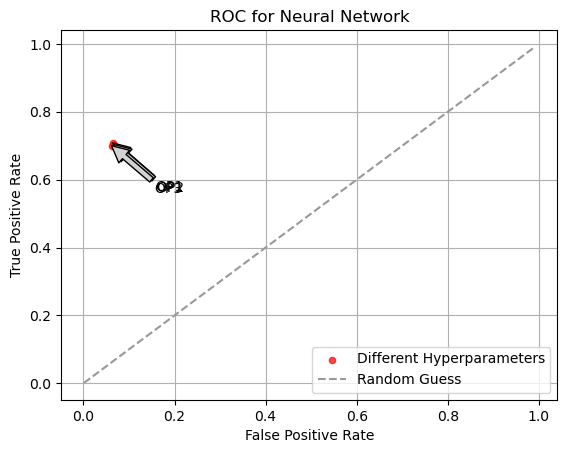

In [28]:
plt.scatter(FPR_list, TPR_list, s=20, marker='o', c='r', label='Different Hyperparameters', alpha=0.7)
plt.plot(np.arange(0.001,1,0.01), np.arange(0.001,1,0.01), linestyle='--', color=(0.6,0.6,0.6), label='Random Guess')
# Annotate certain operating points
annot(1, FPR_list[0], TPR_list[0])
annot(2, FPR_list[1], TPR_list[1])
annot(3, FPR_list[2], TPR_list[2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for Neural Network')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [29]:
neural_results1 = pd.DataFrame(param_list)
neural_results2 = pd.DataFrame({'TPR': TPR_list,
                              'FPR': FPR_list,
                              'Accuracy': accuracy_list})

neural_results = pd.concat([neural_results1, neural_results2], axis=1)

In [30]:
neural_results.sort_values('Accuracy',ascending=False)

,solver,learning_rate,early_stopping,activation,hidden_layer_sizes,TPR,FPR,Accuracy
0,adam,constant,True,relu,"(100,)",0.708155,0.064154,0.816719
2,adam,constant,True,tanh,"(100,)",0.699818,0.061612,0.813601
1,adam,constant,True,logistic,"(100,)",0.703491,0.066948,0.812982


In [31]:
#### Evaluate best hyperparameter model on the testing data
def output_test_results(preds, actuals):
    tn, fp, fn, tp = confusion_matrix(actuals, preds).ravel()
    TPR = tp/(tp+fn) # Pd
    FPR = fp/(fp+tn)  # Pf
    accuracy = accuracy_score(actuals, preds)

    return TPR, FPR, accuracy
best_neural = MLPClassifier(early_stopping=True, activation='relu', hidden_layer_sizes=(100,), solver='adam')

best_neural.fit(X_train, y_train)
y_preds = best_neural.predict(X_test)

TPR, FPR, accuracy = output_test_results(y_preds, y_test)
print(f"TPR: {round(TPR*100,2)}%")
print(f"FPR: {round(FPR*100,2)}%")
print(f"Accuracy: {round(accuracy*100,2)}%")

TPR: 69.3%
FPR: 6.29%
Accuracy: 80.96%


# 2. Pd-Pf interaction

*What kind of behavior would you expect to see in Pd – Pf interaction of an ROC plot? Do you see it in yours? (Hint: Pd and Pf corresponds to TPR and FPR)*

You can't have both. Generally if you have a high Pd, then you have a lower Pf. If you have a high Pf, then you have a low Pd.

There's some models that have a high AUC score that would be pretty good at both, but you still have to choose which one you want to prioritize.

I see it a bit in the decision tree classifier. The random forest is so robust that it generally lands on the same spots in the ROC curve. 

I think trying a logistic regression (from the lecture) might give some more interesting results when we tune its hyperparameters. 

# 3. Choosing the model

*From the ROC plot that you created make a selection of the classifier and hyper-*
*parameter setting for this problem. Note that we are classifying fake news so your*
*conclusion might be subjective but has to be supported by your findings*


Either the neural network or the random forest do well on the test data. I will stick with random forest because it is more robust and it has a lower FPR. 

Hyperparameters don't seem too important for affecting the ROC curve for the Random Forest, but I will just stick with the ones that had the best accuracy score (with 20 depth, 10 min_samples, 100 estimators, and max_features= log2).

As for balancing precision vs. recall, my personal opinion is we should focus more on recall because the cost of allowing fake news to float around is higher. Also, most good quality, true news are shared by credible news outlets like AP. 

Let's try some different probability thresholds to find a good model that limits fake news but still has decent results.

In [32]:
def test_fpr_tpr_prob_threshold(_probabilities, _threshold, _actuals): 
    y_pred = (_probabilities >= _threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(_actuals, y_pred).ravel()
    TPR = tp/(tp+fn) # Pd
    FPR = fp/(fp+tn)  # Pf
    
    return TPR, FPR

In [33]:
best_forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=10, max_features='log2')
best_forest.fit(X_train, y_train)
y_pred_prob = best_forest.predict_proba(X_test)[:, 1] # get positive class probabilities

TPR_list, FPR_list = [], []
for threshold in np.linspace(0.05, 1., 20):
    TPR, FPR = test_fpr_tpr_prob_threshold(y_pred_prob, threshold, y_test)
    TPR_list.append(TPR)
    FPR_list.append(FPR)

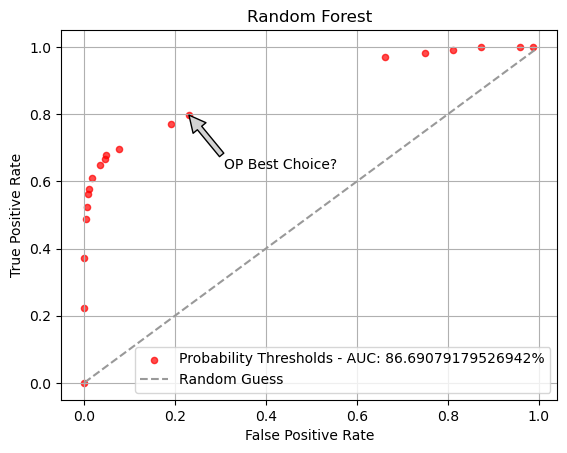

In [34]:
from sklearn.metrics import auc
AUC_score = auc(FPR_list, TPR_list)

plt.scatter(FPR_list, TPR_list, s=20, marker='o', c='r', label=f'Probability Thresholds - AUC: {AUC_score*100}%', alpha=0.7)
plt.plot(np.arange(0.001,1,0.01), np.arange(0.001,1,0.01), linestyle='--', color=(0.6,0.6,0.6), label='Random Guess')
annot(' Best Choice?', FPR_list[6], TPR_list[6])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

That's a pretty good AUC score! I think I would choose a probability threshold at the OP Best Choice point. It would give around 80% TPR and 20% FPR. 

# 4. Adding text column to the features

*Try adding text column to the features. Report the performance of a new classifier*
*model of your choosing. Why do you think the performance is much higher than the*
*previous one which only uses title column?*


In [35]:
X2 = TfidfVectorizer(stop_words='english', max_features=50).fit_transform(df['text'])

In [36]:
X2_df = pd.DataFrame(X2.toarray())
X2_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.000000,0.176164,0.055156,0.000000,0.000000,0.102002,0.0,0.050827,0.122255,...,0.000000,0.000000,0.0,0.257652,0.060661,0.000000,0.00000,0.0,0.697057,0.156381
1,0.291495,0.159332,0.000000,0.293397,0.143082,0.321296,0.000000,0.0,0.000000,0.000000,...,0.127063,0.000000,0.0,0.587382,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
2,0.000000,0.099815,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.067900,...,0.000000,0.077764,0.0,0.061329,0.606443,0.000000,0.00000,0.0,0.077429,0.000000
3,0.000000,0.105973,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.144179,...,0.000000,0.000000,0.0,0.651120,0.429237,0.000000,0.08768,0.0,0.082206,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.193118,...,0.226394,0.000000,0.0,0.523280,0.000000,0.236838,0.00000,0.0,0.000000,0.000000


In [37]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_df, y, test_size=0.1, random_state=0, shuffle=True)

In [38]:
best_forest2 = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=10, max_features='log2')
best_forest2.fit(X2_train, y2_train)
y2_pred_prob = best_forest2.predict_proba(X2_test)[:, 1] # get positive class probabilities

TPR_list2, FPR_list2 = [], []
for threshold in np.linspace(0.05, 1., 20):
    TPR, FPR = test_fpr_tpr_prob_threshold(y2_pred_prob, threshold, y2_test)
    TPR_list2.append(TPR)
    FPR_list2.append(FPR)

In [39]:
AUC_score2 = auc(FPR_list2, TPR_list2)

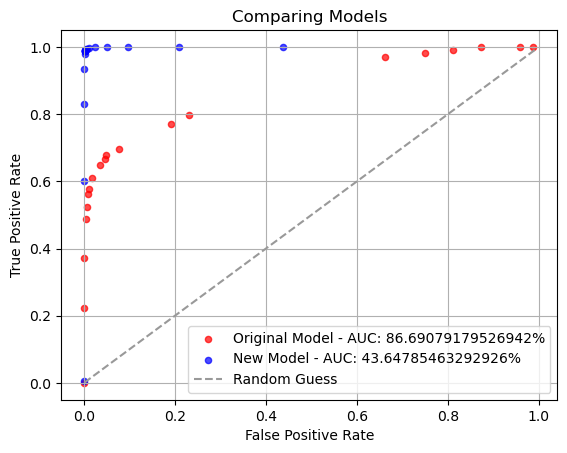

In [40]:
plt.scatter(FPR_list, TPR_list, s=20, marker='o', c='r', label=f'Original Model - AUC: {AUC_score*100}%', alpha=0.7)
plt.scatter(FPR_list2, TPR_list2, s=20, marker='o', c='b', label=f'New Model - AUC: {AUC_score2*100}%', alpha=0.7)
plt.plot(np.arange(0.001,1,0.01), np.arange(0.001,1,0.01), linestyle='--', color=(0.6,0.6,0.6), label='Random Guess')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Comparing Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()

I'm not sure why AUC is looking so weird, but the model is performing way better

In [41]:
accuracy_score(y2_test, y2_pred_prob >= 0.5)

0.9942093541202672

: 

The accuracy is very high now, likely because there's more useful information in the text of the articles that would signal a fake article vs. a real one. It's easier to fake a title because it's shorter and generally simpler. 

I think the title just didn't give enough information for the model to learn.